### Health Insurance Cost Prediction

In [1]:
import pandas as pd

data=pd.read_csv("D:\programming\AI & ML\data set/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


find basic info

In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

find unique values

In [7]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [8]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [9]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

convert data to num using map

In [10]:
data['sex']=data['sex'].map({"male":1,"female":0})
data['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [11]:
data['smoker']=data['smoker'].map({"yes":1,"no":0})
data['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [12]:
data['region']=data['region'].map({"southwest":1,"southeast":2,"northwest":3,"northeast":4})
data['region']

0       1
1       2
2       2
3       3
4       3
       ..
1333    3
1334    4
1335    2
1336    1
1337    3
Name: region, Length: 1338, dtype: int64

Store matrix in X and target in y

In [13]:
X=data.drop(['charges'],axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [14]:
y=data['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,3
1285,47,0,24.320,0,0,4
1142,52,0,24.860,0,0,2
969,39,0,34.320,5,0,2
486,54,0,21.470,3,0,3
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,4
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,4
860,37,0,47.600,2,1,1


In [17]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

import the model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

model training

In [19]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
sv=SVR()
sv.fit(X_train,y_train)

SVR()

In [21]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [22]:
gr=GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

value prediction

In [23]:
y_pred1=lr.predict(X_test)
y_pred2=sv.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gr.predict(X_test)

In [24]:
data={"Actual":y_test,"lin":y_pred1,"svr":y_pred2,"rf":y_pred3,"gr":y_pred4}
df=pd.DataFrame(data)
df

,Actual,lin,svr,rf,gr
764,9095.06825,8924.407244,9548.261584,12061.057189,11001.128629
887,5272.17580,7116.295018,9492.515425,5428.624129,5840.174656
890,29330.98315,36909.013521,9648.758701,28391.119293,28001.980112
1293,9301.89355,9507.874691,9555.044136,10350.155379,9745.291602
259,33750.29180,27013.350008,9420.421978,34646.557295,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47131.549773,45431.423211
575,12222.89830,11814.555568,9625.431547,12096.747411,12465.025294
535,6067.12675,7638.107736,9504.168517,6394.082533,6974.336525
543,63770.42801,40959.081722,9605.004594,46811.369474,47862.047791


comper model

In [25]:
import matplotlib.pyplot as plt

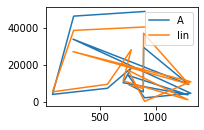

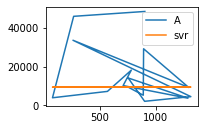

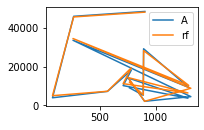

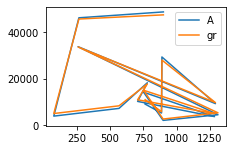

In [26]:
plt.subplot(221)
plt.plot(df['Actual'].iloc[0:15],label="A")
plt.plot(df['lin'].iloc[0:15],label="lin")
plt.legend()
plt.show()

plt.subplot(222)
plt.plot(df['Actual'].iloc[0:15],label="A")
plt.plot(df['svr'].iloc[0:15],label="svr")
plt.legend()
plt.show()

plt.subplot(223)
plt.plot(df['Actual'].iloc[0:15],label="A")
plt.plot(df['rf'].iloc[0:15],label="rf")
plt.legend()
plt.show()

plt.subplot(224)
plt.plot(df['Actual'].iloc[0:15],label="A")
plt.plot(df['gr'].iloc[0:15],label="gr")
plt.tight_layout()
plt.legend()
plt.show()

Evaluting Algoritham

In [27]:
from sklearn import metrics

In [28]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

print(score1,score2,score3,score4)

0.7833463107364539 -0.07229762787861826 0.8630661742789694 0.8779726251291786


In [29]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

print(s1,s2,s3,s4)

4186.508898366435 8592.428727899724 2528.7111728455193 2447.9515580545844


save model using joblib

In [30]:
gr=GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [31]:
gr.score(X_train,y_train)

0.8945184769956792

In [32]:
import joblib

In [33]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [34]:
model=joblib.load('model_joblib_gr')

In [35]:
d={"age":35,"sex":0,"bmi":30,"children":2,"smoker":0,"region":3}
df1=pd.DataFrame(d,index=[0])
df1

,age,sex,bmi,children,smoker,region
0,35,0,30,2,0,3


In [36]:
model.predict(df1)

array([7882.86887088])

GUI

In [37]:
from tkinter import *
import joblib

In [38]:
def show_result():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    
    model=joblib.load('model_joblib_gr')
    result=model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master,text="Charges").grid(row=7)
    Label(master,text=result).grid(row=8)



master=Tk()

master.title("Health Insurance Cost Prediction")
laabel=Label(master,text="Health Insurance Cost Prediction",bg="black",fg="white").grid(row=0,columnspan=2)
Label(master,text="Age").grid(row=1)
Label(master,text="Sex male/female[1/0]").grid(row=2)
Label(master,text="BMI").grid(row=3)
Label(master,text="Childern").grid(row=4)
Label(master,text="Smoker yes/no[1/0]").grid(row=5)
Label(master,text="region [1-4]").grid(row=6)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

Button(master,text="prdict",command=show_result).grid()



mainloop()